## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [3]:
#Splitting the data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Program Files\Miniconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Program Files\Miniconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [4]:
# Fitting Logistic Regression to the dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting a new result
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


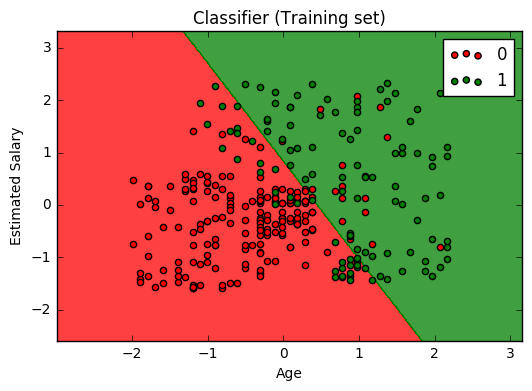

[[ 2.06169269  1.10338288]]


In [5]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print(classifier.coef_)

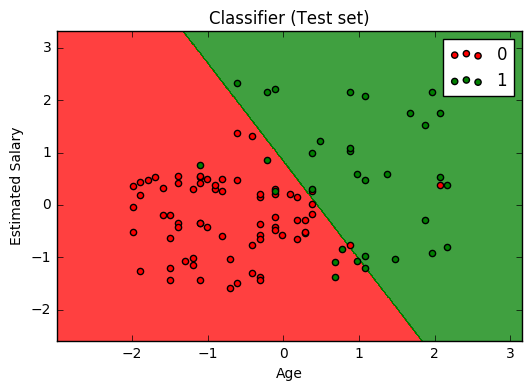

In [6]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


In [7]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

In [8]:
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   ((0.0, 1.0, 1.0),
                    (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))}
red2green = LinearSegmentedColormap('Red2Green', cdict)

In [9]:
from ipywidgets import interactive, fixed

def plot_3d(elevation, azimuth, mode):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(0, figsize=(10,6))
    ax = fig.add_subplot(111, projection='3d')
    
    #Classifier params
    w1, w2, b = classifier.coef_[0][0], classifier.coef_[0][1], classifier.intercept_[0]
    
    #Data
    xs, ys = X_set[:,0], X_set[:,1]
    if mode == 'Original data':
        zs = y_set
    else:
        y_ = w1*xs + w2*ys + b
        zs = p = 1/(1+np.exp(-y_))
    ax.scatter(xs, ys, zs, c=['r' if y == 0 else 'g' for y in y_set])
    
    #Logistic regression 
    X1, X2 = np.meshgrid(np.arange(start = xs.min(), stop = xs.max(), step = 0.02),
                         np.arange(start = ys.min(), stop = ys.max(), step = 0.02))
    y_prob = classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:,1].reshape(X1.shape)
    ax.plot_surface(X1, X2, y_prob, alpha = 0.5, cmap = red2green, linewidth=0)

    #Planes
    x1min, x1max, x2min, x2max = xs.min() - 1, xs.max() + 1, ys.min() - 1, ys.max() + 1
    x1, x2 = np.meshgrid([x1min,x1max], [x2min,x2max])
    ax.plot_surface(x1, x2,  np.ones(x1.shape), alpha = 0.1, color = 'k', linewidth=0)
    ax.plot_surface(x1, x2, np.zeros(x1.shape), alpha = 0.1, color = 'k', linewidth=0)

    #Settings
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlim(x1min, x1max)
    ax.set_ylim(x2min, x2max)
    ax.set_zlim(0, 1)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    plt.show()

In [10]:
X_set, y_set = X_train, y_train
interactive_plot = interactive(plot_3d, elevation = (0, 180, 5), azimuth = (0, 180, 1), mode = ['Original data','Projected data'])                                     
interactive_plot